# Analysis of Heat Disease Diagnostic

## Introduction and defination of features in the dataset

- age: The patient's age. One major risk factor for heart disease is age.


- sex: The patient's gender (0 for female, 1 for male). There is a gender component to heart disease risk. As more cases have been reported related cardiovascular diseases in men.


- chest pain (cp): Type of chest pain (0-4). There are many kinds of chest discomfort that might signify different risk factors for heart disease.


- trestbps: Resting blood pressure: Measured in millimeter-Hg. One of the main risk factors for heart disease is high blood pressure.


- serum cholesterol (chol) mg/dl: Elevated cholesterol levels may result in atherosclerosis, hence elevating the risk of cardiovascular disease.


- fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false). Diabetes is a significant risk factor for heart disease.


- restecg: Resting electrocardiographic results (0-2). <br>
    0: Normal <br>
    1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
    2: Showing probable or definite left ventricular hypertrophy by Estes' criteria<br>


- thalach: Maximum heart rate achieved. Lower maximum heart rates can indicate poorer cardiovascular fitness.


- exang: Exercise-induced angina (1 = yes, 0 = no).


- oldpeak: ST depression induced by exercise relative to rest. This can indicate the severity of ischemia.


- slope: The slope of the peak exercise ST segment (0-2). <br>
    0: Upsloping<br>
    1: Flat<br>
    2: Downsloping<br>


- ca: Number of major vessels (0-4) colored by fluoroscopy. <br>


- thal: Thalassemia (1-3). <br>
    1: Normal<br>
    2: Fixed defect<br>
    3: Reversible defect<br>


- target: Presence of heart disease (1 = yes, 0 = no). This is the outcome variable indicating whether the patient has heart disease.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Heart Disease data.csv')

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
data.shape

(1025, 14)

## Observations

<h4>
There is 1025 records in the dataset <br>
    
There are 14 features that are non-null in the dataset <br>

All the features present in the dataset are numerical type
</h4>

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
print(f"Youngest among the patients diagnosed: {data['age'].min()}")
print(f"Oldest among the patients diagnosed: {data['age'].max()}")

Youngest among the patients diagnosed: 29
Oldest among the patients diagnosed: 77


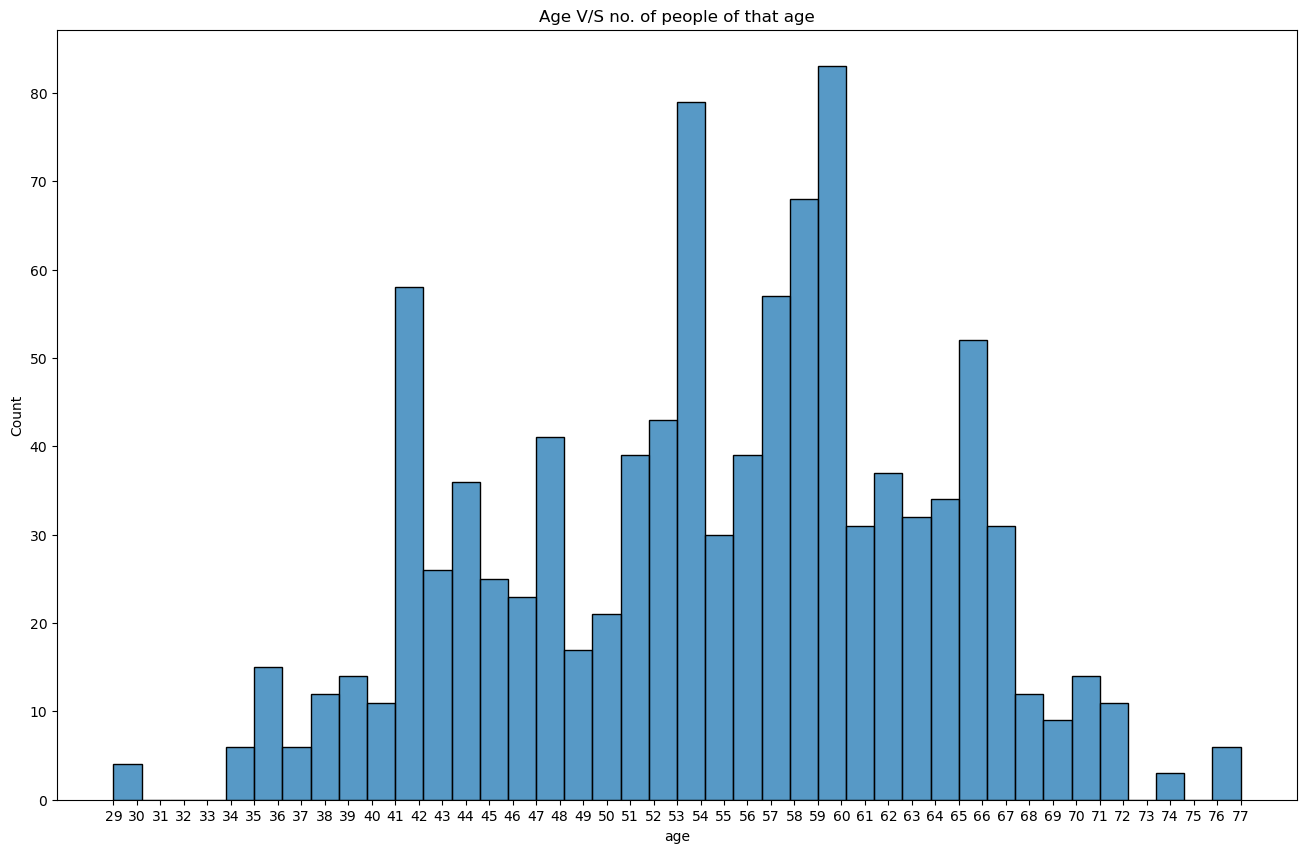

In [130]:
plt.figure(figsize=(16,10))
plt.title('Age V/S no. of people of that age')
plt.xticks(range(29,78))
sns.histplot(data = data, x = 'age', bins = 40)
plt.show()

In [9]:
data['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

## Observation

<h4>
The dataset includes the medical records of indiviuals from 29 to 77 of age <br>

Among which 713 are male (assuming because men are generally more represented in cardiovascular datasets due to higher historical rates of heart disease in men compared to women) and 312 are females (assumption)
</h4>

In [10]:
data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

In [11]:
data['target'].value_counts(normalize=True)

1    0.513171
0    0.486829
Name: target, dtype: float64

In [12]:
data.groupby('sex')['target'].value_counts(normalize=True)

sex  target
0    1         0.724359
     0         0.275641
1    0         0.579243
     1         0.420757
Name: target, dtype: float64

## Observation

<h4>
The dataset contains medical records of individuals among which 51% individuals have been diagnosed with a heart disease and other 49% <br>

This further confirms our assumption that men are diagnosed with cardiovascular diseases more often then women
</h4>

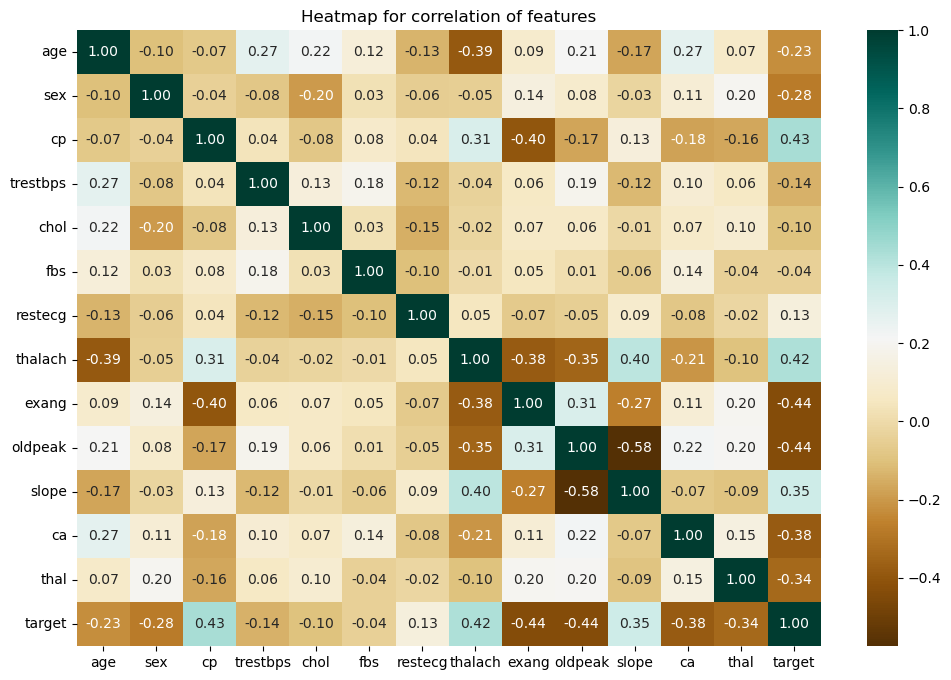

In [13]:
plt.figure(figsize=(12,8))
plt.title('Heatmap for correlation of features')

sns.heatmap(data = data.corr(), cmap='BrBG', annot=True, fmt='.2f')
plt.show()

## Checking columns for outlier (only those which have more than 4 unique values)

In [14]:
outlier_check_columns = [column for column in data.columns if len(data[column].value_counts()) > 5]
print(outlier_check_columns)

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


## Visualising outliers using boxplot in different features

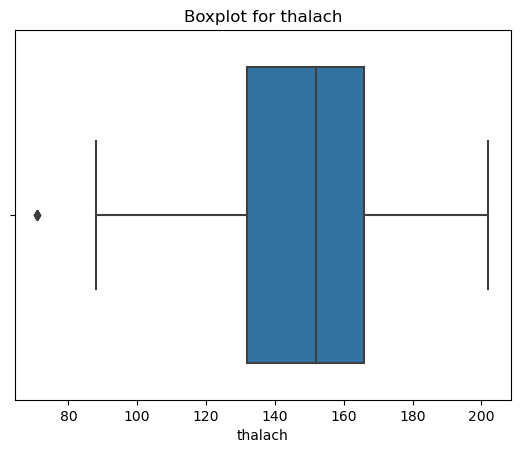

In [75]:
sns.boxplot(data = data, x='thalach')
plt.title('Boxplot for thalach')
plt.show()

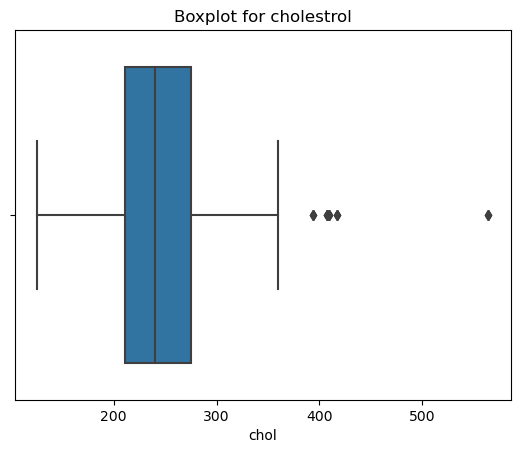

In [86]:
sns.boxplot(data = data, x='chol')
plt.title('Boxplot for cholestrol')
plt.show()

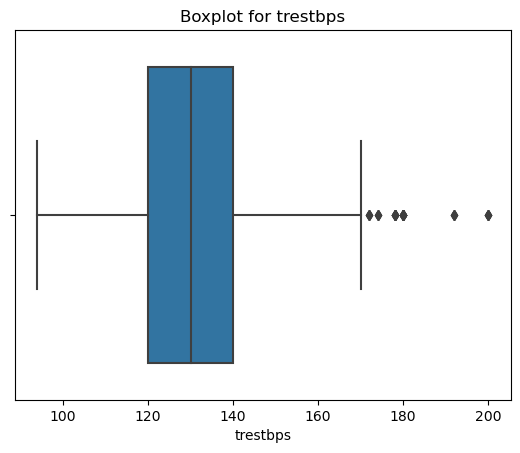

In [82]:
sns.boxplot(data = data, x='trestbps')
plt.title('Boxplot for trestbps')
plt.show()

## Outlier detection using IQR

In [15]:
def outlier_detection(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers.update({column : [value for value in df[column] if value <= lower_bound or value >= upper_bound]})
    return outliers

data_outliers = outlier_detection(data[outlier_check_columns])

## Removing features from outliers dictionary if they are empty

In [16]:
no_outlier_features = [feature for feature in data_outliers if len(data_outliers[feature]) == 0]

for feature in no_outlier_features:
    data_outliers.pop(feature)

data_outliers

{'trestbps': [180,
  178,
  170,
  170,
  174,
  170,
  180,
  192,
  170,
  200,
  170,
  178,
  170,
  192,
  180,
  170,
  200,
  192,
  172,
  180,
  170,
  174,
  178,
  180,
  200,
  180,
  178,
  170,
  180,
  170,
  178,
  174,
  180,
  170,
  200,
  170,
  170,
  172,
  170,
  170,
  180,
  178,
  178,
  172,
  180],
 'chol': [417,
  564,
  409,
  564,
  394,
  407,
  564,
  407,
  394,
  394,
  409,
  417,
  407,
  407,
  417,
  409],
 'thalach': [71, 71, 71, 71],
 'oldpeak': [5.6, 5.6, 6.2, 6.2, 6.2, 5.6, 5.6]}

## Removing duplicate values from the outliers dictionary

In [17]:
for key in data_outliers.keys():
    data_outliers.update({key: set(data_outliers[key])})

In [18]:
data_outliers

{'trestbps': {170, 172, 174, 178, 180, 192, 200},
 'chol': {394, 407, 409, 417, 564},
 'thalach': {71},
 'oldpeak': {5.6, 6.2}}

In [61]:
data.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


# Scatterplot for cp

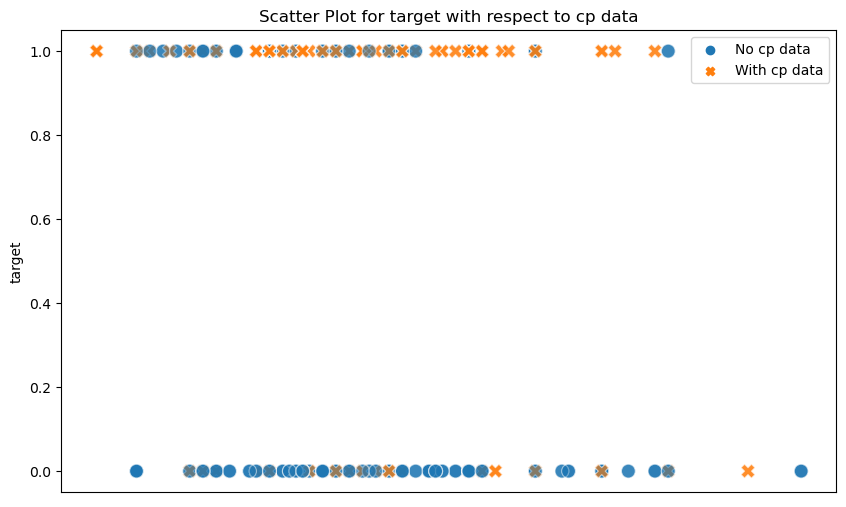

In [36]:
scatter_data = data.copy()

# Creating a new column to differentiate the points
scatter_data['highlighted'] = 'No cp data'

scatter_data.loc[scatter_data['cp'] > 0, 'highlighted'] = 'With cp data'

# Creating a scatter plot and adding the figure size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='trestbps', y='target', hue='highlighted', style='highlighted', s=100, alpha=.5)

plt.title('Scatter Plot for target with respect to cp data')
plt.xticks([])
plt.xlabel('')
plt.legend()
plt.show()

In [24]:
scatter_data['highlighted'].value_counts()

With cp data    528
No cp data      497
Name: highlighted, dtype: int64

## Observation

#### As can be seen in the above scatter plot, majority of the heart diseases are associated with chest pain as a symptom

# Scatterplot for exang

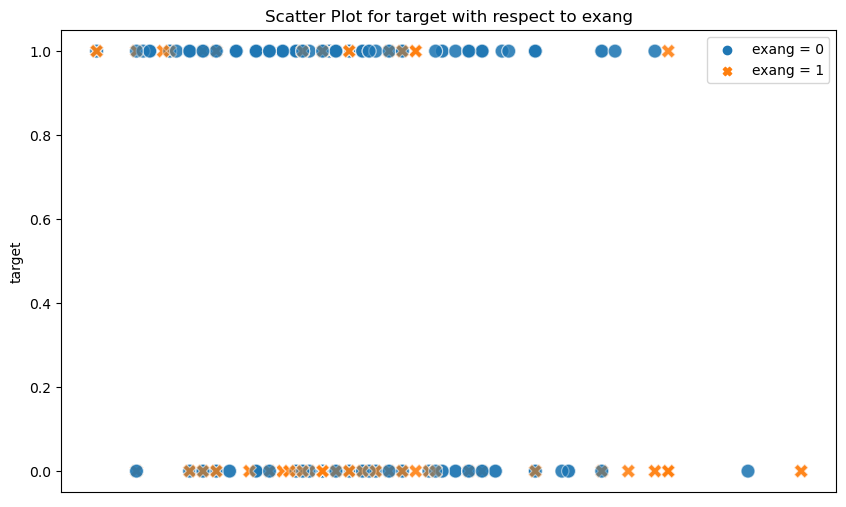

In [52]:
scatter_data = data.copy()

# Creating a new column to differentiate the points
scatter_data['highlighted'] = 'exang = 1'

scatter_data.loc[scatter_data['exang'] == 0, 'highlighted'] = 'exang = 0'

# Creating a scatter plot and adding the figure size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='trestbps', y='target', hue='highlighted', style='highlighted', s=100, alpha=.5)

plt.title('Scatter Plot for target with respect to exang')
plt.xticks([])
plt.xlabel('')
plt.legend()
plt.show()

In [68]:
data.groupby('exang')['target'].value_counts()

exang  target
0      1         455
       0         225
1      0         274
       1          71
Name: target, dtype: int64

## Observation

#### In the above plot we can see that records with exang = 0 have majority of target values as 1 which shows that there is higher chance of facing a heart disease if exang is not present

# Scatterplot for oldpeak

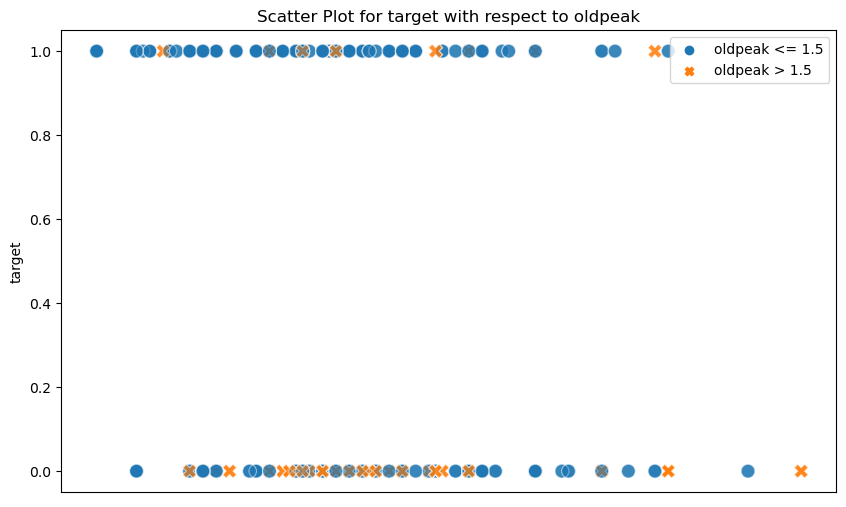

In [67]:
scatter_data = data.copy()

# Creating a new column to differentiate the points
scatter_data['highlighted'] = 'oldpeak > 1.5'

scatter_data.loc[scatter_data['oldpeak'] <= 1.5, 'highlighted'] = 'oldpeak <= 1.5'

# Creating a scatter plot and adding the figure size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='trestbps', y='target', hue='highlighted', style='highlighted', s=100, alpha=.5)

plt.title('Scatter Plot for target with respect to oldpeak')
plt.xticks([])
plt.xlabel('')
plt.legend()
plt.show()

## Observation

#### As can be seen in the above plot, values with <= 1.5 in oldpeak have higher chance of having a heart disease

# Scatterplot for thal

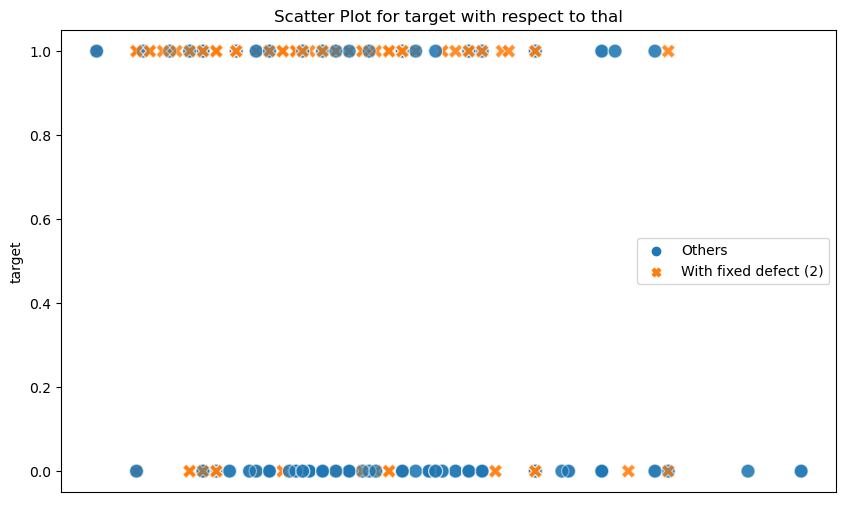

In [37]:
scatter_data = data.copy()

# Creating a new column to differentiate the points
scatter_data['highlighted'] = 'Others'

scatter_data.loc[scatter_data['thal'] == 2, 'highlighted'] = 'With fixed defect (2)'

# Creating a scatter plot and adding the figure size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='trestbps', y='target', hue='highlighted', style='highlighted', s=100, alpha=.5)

plt.title('Scatter Plot for target with respect to thal')
plt.xticks([])
plt.xlabel('')
plt.legend()
plt.show()

In [26]:
scatter_data['highlighted'].value_counts()

With fixed defect (2)    544
Others                   481
Name: highlighted, dtype: int64

## Observation

#### In the above scatter plot one can see that many of the patients with thal value as 2 have been diagnosed to have heart diseases

# Conclusion

<h4>
So the final conclusion is that factors such as chest pain,old peak, exang, and thal act as the main indicators for detecting heart diseases <br>

It is also true that other factors such cholestrol(chol) and fasting blood sugar(fbs) can also indicate heart diseases but we do not see much evidence of correlation of target with chol and fbs in our dataset

# Using Logistic Regression to predict the values for target

In [132]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = data.drop(columns=['target', 'trestbps', 'fbs', 'restecg', 'chol'])
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the logistic regression model
model = LogisticRegression(max_iter=1000)

# Training the model
model.fit(X_train, y_train)

# Using the model to make predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8
Confusion Matrix:
 [[74 28]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

